**Nome:**Laura\
**Cognome**: Nembrini \
**Matricola:** 819059

# ASSIGNMENT 2


In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Image management
from skimage import io # Input/output
from skimage import transform # Geometric transformations (e.g. resize)
from skimage import filters # Local processing
from skimage import color # Change of color space


## CARICAMENTO IMMAGINI

In [2]:
plt.rcParams['figure.figsize'] = [15,5]

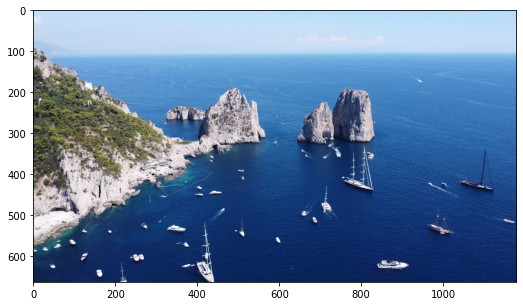

In [3]:
img = io.imread('images/Capri.jpg')
plt.imshow(img); plt.show()

In [4]:
img.shape

(663, 1179, 3)

# RGB COLOR SPACE


Uno spazio colore RGB è definito dalle coordinate di cromaticità dei primari additivi rosso, verde e blu. Il bianco è ottenuto dal valore massimo di ciascuno dei 3 canali mentre il nero è il valore minimo dei 3 canali.


Text(0.5, 1.0, 'Blue')

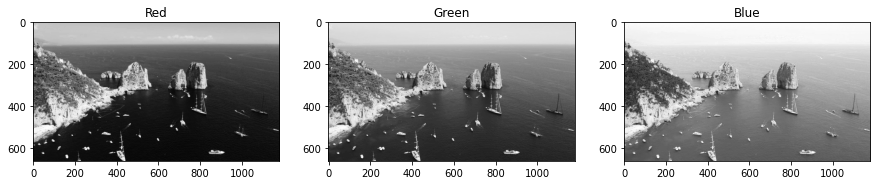

In [5]:
plt.subplot(1,3,1)
plt.imshow(img[:,:,0], cmap='gray')
plt.title('Red')


plt.subplot(1,3,2)
plt.imshow(img[:,:,1], cmap='gray')
plt.title('Green')


plt.subplot(1,3,3)
plt.imshow(img[:,:,2], cmap='gray')
plt.title('Blue')

## YCbCr color space

**Y** è il componente di luma, ovvero la componente di luminanza. Sta a rappresentare l'intensità della luce del colore. Nel canale Y, tutti gli elementi dell'immagine appaiono chiaramente.\
**Cb** e  **Cr** sono la componente blu e rossa relativa alla componente cromatica. Questi componenti sono meno sensibili agli occhi umani rispetto alla precedente.
Gli elementi in questo caso non sono molto chiari. \

Nel canale Cb il bianco rappresenta l'alto livello di Blu e le tonalità più scure sono la componente gialla; nei canali Cr il valore più scuro sta per il colore verde e il bianco sta per il rosso. 

In [6]:
im_ycbcr = color.rgb2ycbcr(img[:,:,:])
im_ycbcr.shape

(663, 1179, 3)

Text(0.5, 1.0, 'Cr: red-green')

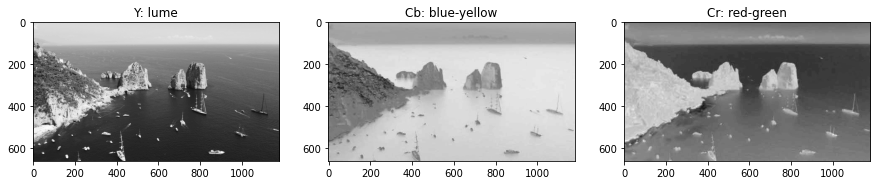

In [7]:
plt.subplot(1,3,1)
plt.imshow(im_ycbcr[:,:,0], cmap='gray')
plt.title('Y: lume')


plt.subplot(1,3,2)
plt.imshow(im_ycbcr[:,:,1], cmap='gray')
plt.title('Cb: blue-yellow')


plt.subplot(1,3,3)
plt.imshow(im_ycbcr[:,:,2], cmap='gray')
plt.title('Cr: red-green')

## Sfocatura 


Creo tre filtri Gaussiani con 3 diverse sigma per sfocare l'immagine

In [12]:
sf_05 = filters.gaussian(im_ycbcr,
                           sigma = 0.5,
                           multichannel = True)

sf_3 = filters.gaussian(im_ycbcr,
                           sigma = 3,
                           multichannel = True)

sf_15 = filters.gaussian(im_ycbcr,
                           sigma = 15,
                           multichannel = True)

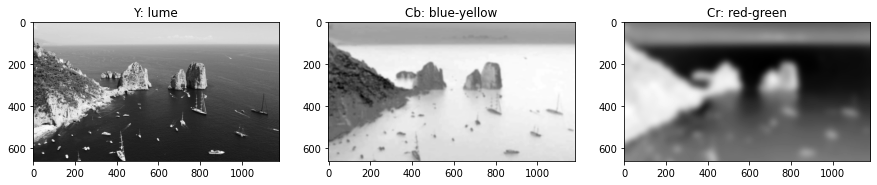

In [15]:
plt.subplot(1,3,1); plt.imshow(sf_05[:,:,0], cmap='gray'); plt.title('Y: lume');
plt.subplot(1,3,2); plt.imshow(sf_3[:,:,1], cmap='gray'); plt.title('Cb: blue-yellow');
plt.subplot(1,3,3); plt.imshow(sf_15[:,:,2], cmap='gray'); plt.title('Cr: red-green');
plt.show()

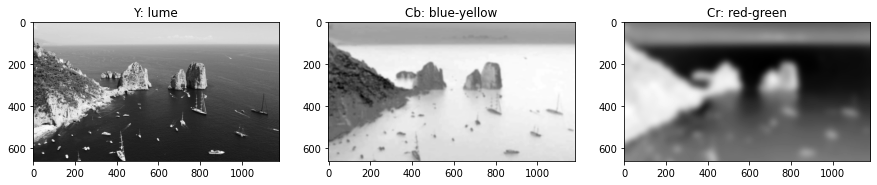

In [16]:
plt.subplot(1,3,1); plt.imshow(sf_05[:,:,0], cmap='gray'); plt.title('Y: lume');
plt.subplot(1,3,2); plt.imshow(sf_3[:,:,1], cmap='gray'); plt.title('Cb: blue-yellow');
plt.subplot(1,3,3); plt.imshow(sf_15[:,:,2], cmap='gray'); plt.title('Cr: red-green');
plt.show()

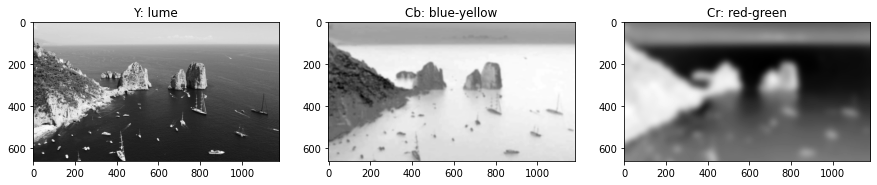

In [17]:
plt.subplot(1,3,1); plt.imshow(sf_05[:,:,0], cmap='gray'); plt.title('Y: lume');
plt.subplot(1,3,2); plt.imshow(sf_3[:,:,1], cmap='gray'); plt.title('Cb: blue-yellow');
plt.subplot(1,3,3); plt.imshow(sf_15[:,:,2], cmap='gray'); plt.title('Cr: red-green');
plt.show()

### Sfocatura solo su CbCr

In [23]:
sf_05b = sf_05.copy()
sf_3b = sf_3.copy()
sf_15b = sf_15.copy()

In [24]:

sf_05b [:,:, 0] = im_ycbcr[:,:, 0]
sf_3b [:,:, 0] = im_ycbcr[:,:, 0]
sf_15b[:,:, 0] = im_ycbcr[:,:, 0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Original')

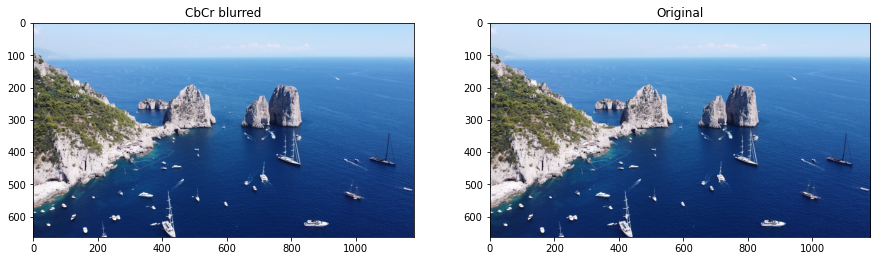

In [25]:
sf_05b = color.ycbcr2rgb(sf_05b)
plt.subplot(121)
plt.imshow(sf_05b)
plt.title('CbCr blurred')

plt.subplot(122)
plt.imshow(img)
plt.title('Original')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Original')

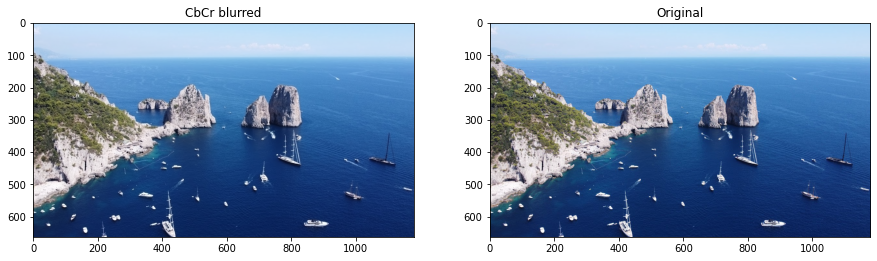

In [26]:
sf_3b = color.ycbcr2rgb(sf_3b)
plt.subplot(121)
plt.imshow(sf_3b)
plt.title('CbCr blurred')

plt.subplot(122)
plt.imshow(img)
plt.title('Original')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Original')

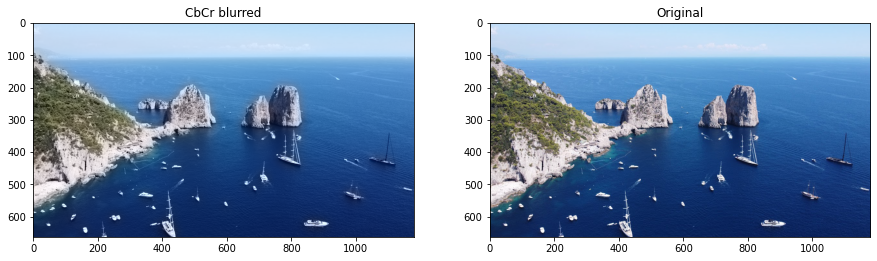

In [27]:
sf_15b= color.ycbcr2rgb(sf_15b)

plt.subplot(121)
plt.imshow(sf_15b)
plt.title('CbCr blurred')

plt.subplot(122)
plt.imshow(img)
plt.title('Original')

### Sfocatura solo su Y

In [29]:
im_ycbcr1 = im_ycbcr.copy()
im_ycbcr2 = im_ycbcr.copy()
im_ycbcr3 = im_ycbcr.copy()

In [31]:
im_ycbcr1[:,:, 0] = sf_05[:,:, 0]
im_ycbcr2[:,:, 0] = sf_3[:,:, 0]
im_ycbcr3[:,:, 0] = sf_15[:,:, 0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Original')

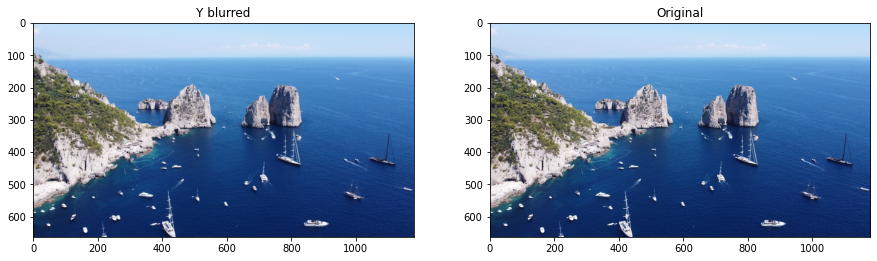

In [32]:
im_ycbcr1 = color.ycbcr2rgb(im_ycbcr1)
plt.subplot(121)
plt.imshow(im_ycbcr1)
plt.title('Y blurred')

plt.subplot(122)
plt.imshow(img)
plt.title('Original')

Text(0.5, 1.0, 'Original')

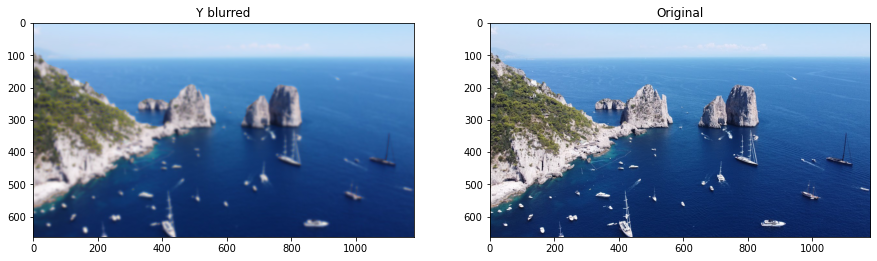

In [33]:
im_ycbcr2 = color.ycbcr2rgb(im_ycbcr2)

plt.subplot(121)
plt.imshow(im_ycbcr2)
plt.title('Y blurred')

plt.subplot(122)
plt.imshow(img)
plt.title('Original')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Original')

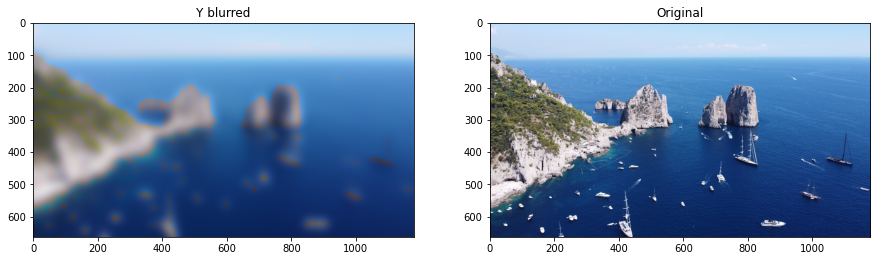

In [34]:
im_ycbcr3 = color.ycbcr2rgb(im_ycbcr3)

plt.subplot(121)
plt.imshow(im_ycbcr3)
plt.title('Y blurred')

plt.subplot(122)
plt.imshow(img)
plt.title('Original')


## Conclusioni

Applicando i filtri per la sfocatura ad alle componenti CbCr e Y, notiamo come l'effetto sul canale Y è nettamente maggiore.